In [1]:
install.packages('DescTools')

package 'DescTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ather\AppData\Local\Temp\RtmpKqqw6d\downloaded_packages


In [58]:
library("dplyr")
library("DescTools")
#cities <- read.csv('/Users/athervgole/Downloads/cities_1.csv')
cities <- read.csv('C:/Users/ather/CS Projects/CETLab/caeecc-energy-efficiency/cities_2.csv')


population <- cities$total_population
population_trimmed <- DescTools::Trim(cities$total_population, trim = 0.02, na.rm = TRUE)

income <- cities$median_household_income_usd
income_trimmed <- DescTools::Trim(cities$median_household_income_usd, trim = 0.02, na.rm = TRUE)

budget <- cities$Budget
budget_trimmed <- DescTools::Trim(cities$Budget, trim = 0.02, na.rm = TRUE)

claims <- cities$Total.Claims
claims_trimmed <- DescTools::Trim(cities$Total.Claims, trim = 0.02, na.rm = TRUE)

taxrev <- cities$Total.Tax.Revenue
taxrev_trimmed <- DescTools::Trim(cities$Total.Tax.Revenue, trim = 0.02, na.rm = TRUE)

programs <- cities$Total.Programs
programs_trimmed <- DescTools::Trim(cities$Total.Programs, trim = 0.02, na.rm = TRUE)

mean_budget <- mean(cities$Budget, na.action = na.exclude)
median_budget <- median(cities$Budget, na.action = na.exclude)



#try taxrev population regressions with and without incorporated cities



n
105


n
104


n
104


n
104


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1514    3346    4881    5054    6629    8746 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9043   11993   15223   15439   18114   24958 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25014   31964   40118   42852   51987   68146 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  68805   81035  110971  197544  159612 2484718 

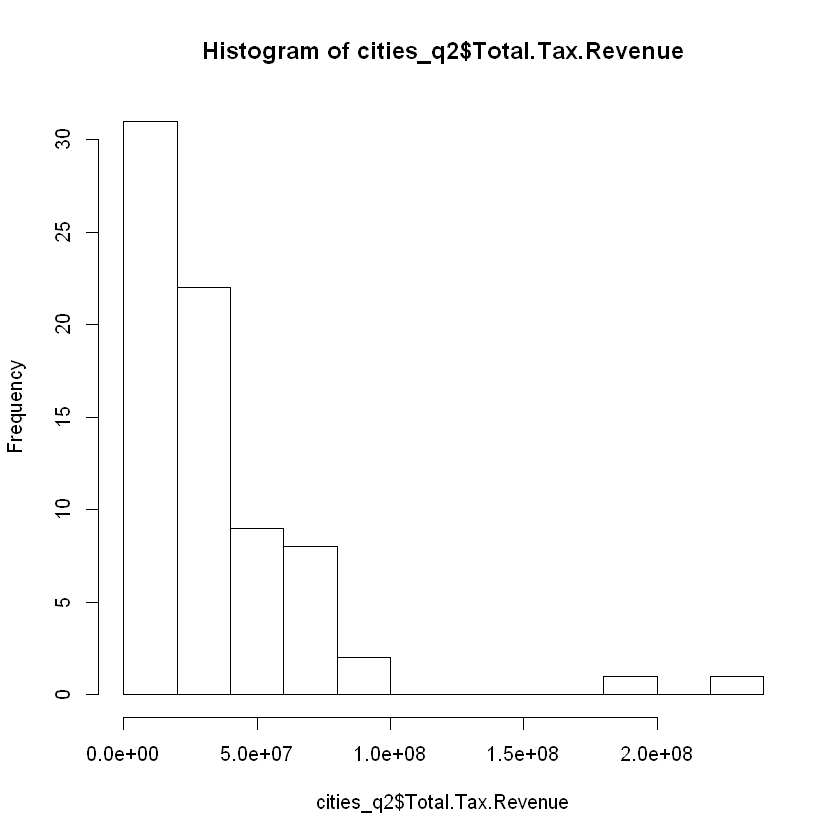

In [20]:
#cities by quartile, even grouping (n=105/group, dropping na)

cities$quartile <- ntile(cities$total_population, 4)

cities_q1 <- subset(cities , quartile == 1)
cities_q2 <- subset(cities, quartile == 2)
cities_q3 <- subset(cities, quartile == 3)
cities_q4 <- subset(cities, quartile == 4)

cities_q <- c(cities_q1, cities_q2, cities_q3, cities_q4)

count(cities_q1)
count(cities_q2)
count(cities_q3)
count(cities_q4)

summary(cities_q1$total_population)
summary(cities_q2$total_population)
summary(cities_q3$total_population)
summary(cities_q4$total_population)

hist(cities_q2$Total.Tax.Revenue)


n
353


n
45


n
7


n
12


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1514    7188   17308   27759   42290   99939 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 102311  110611  127231  133324  151412  199851 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 204601  219755  227727  237241  255420  278008 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 347532  398308  574330  806517  918146 2484718 

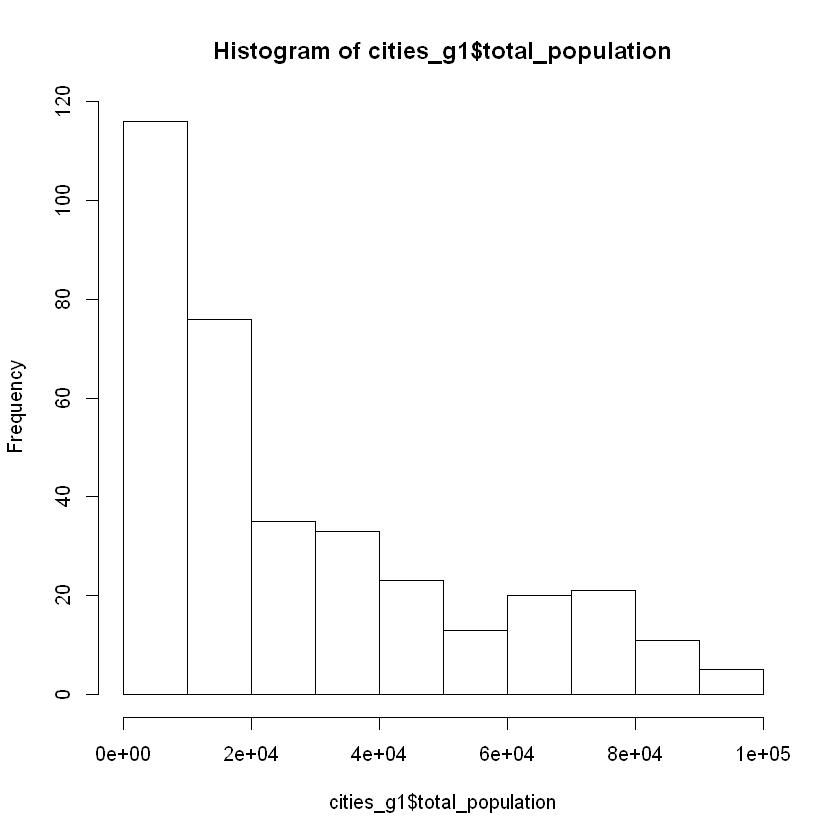

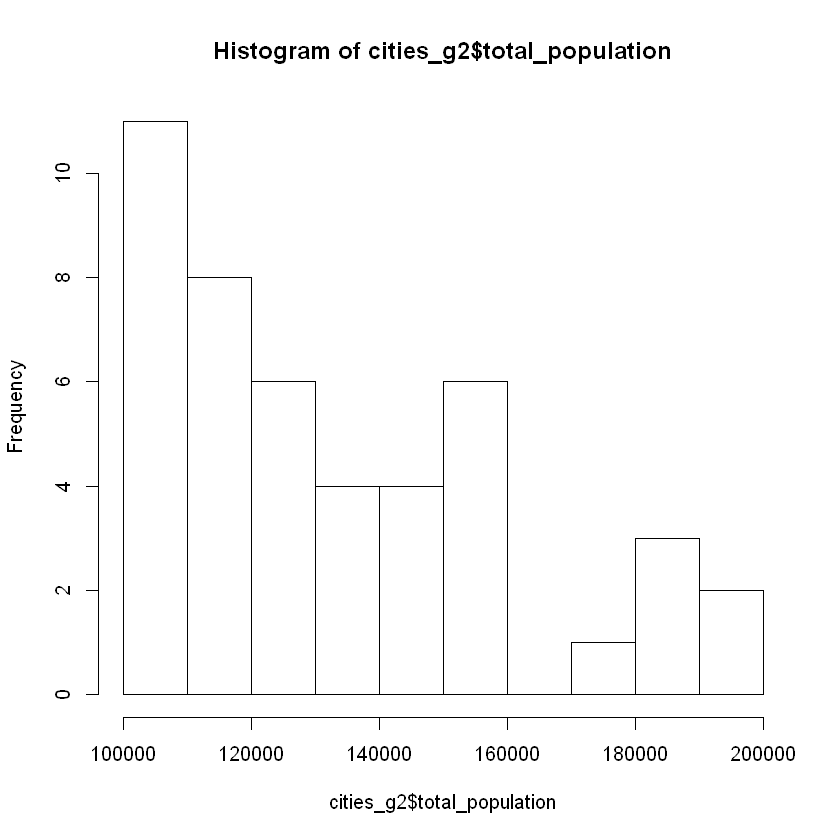

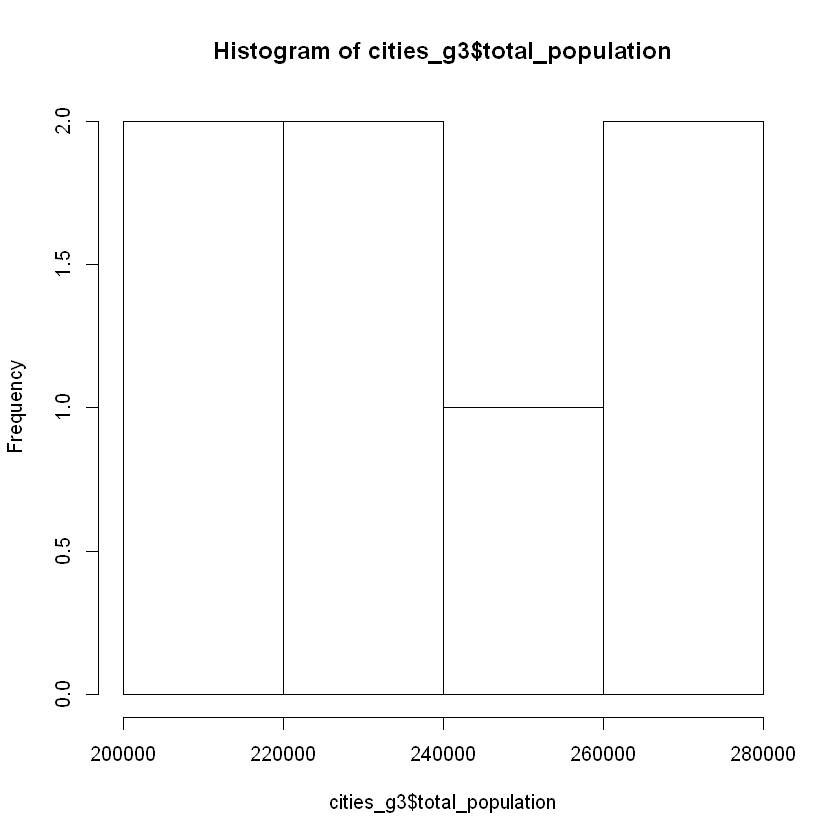

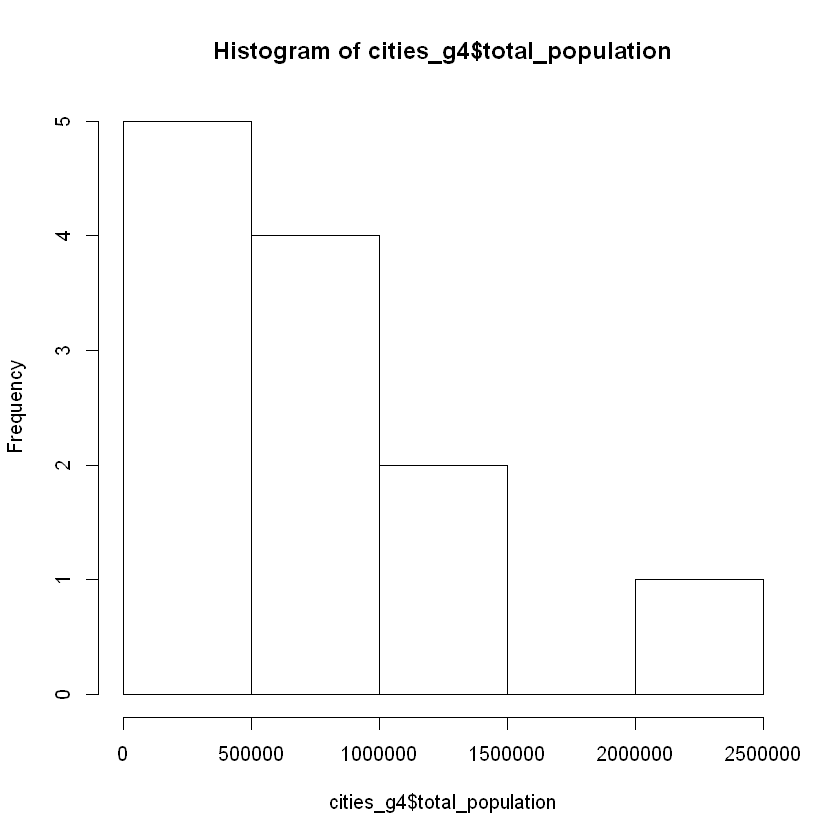

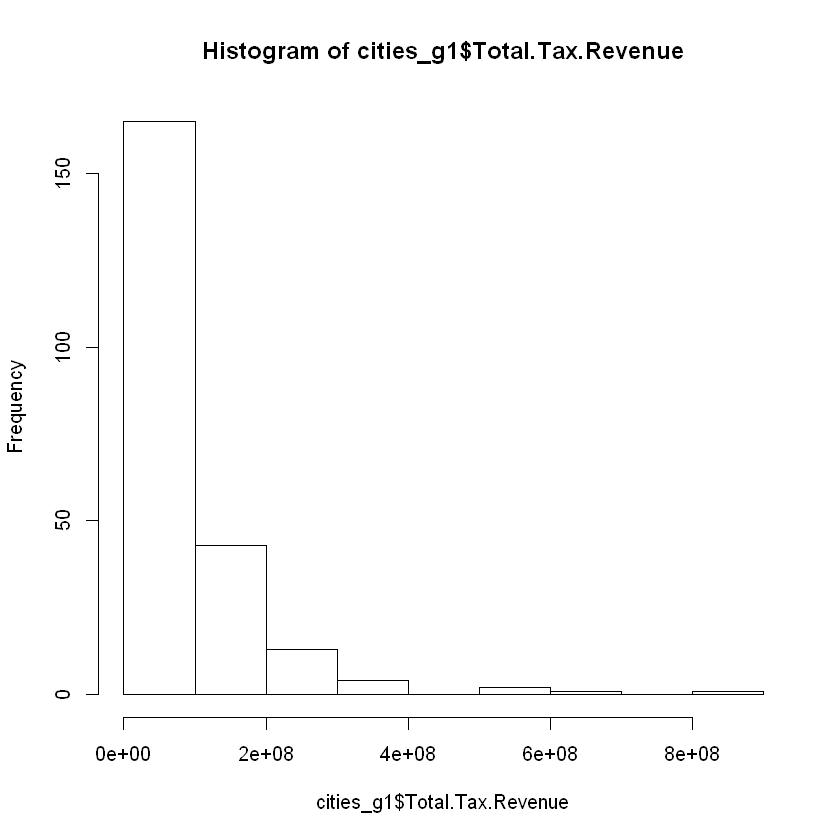

In [21]:
#cities by 1/4 of population range
#population ranges from 1514 to 2484718 (extreme value)
#I tried breaking it up by 100000's, and put the >400000 values in the same group

cities_g1 <- subset(cities, total_population <= 100000)
cities_g2 <- subset(cities, total_population > 100000 & population <= 200000)
cities_g3 <- subset(cities, total_population > 200000 & population <= 300000)
cities_g4 <- subset(cities, total_population > 300000)

cities_g <- c(cities_g1, cities_g2, cities_g3, cities_g4)


count(cities_g1)
count(cities_g2)
count(cities_g3)
count(cities_g4)

summary(cities_g1$total_population)
summary(cities_g2$total_population)
summary(cities_g3$total_population)
summary(cities_g4$total_population)

hist(cities_g1$total_population)
hist(cities_g2$total_population)
hist(cities_g3$total_population)
hist(cities_g4$total_population)

hist(cities_g1$Total.Tax.Revenue)



n
18


n
182


n
192


n
25


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1514    1843    2496    2352    2740    2979 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2987    5616    9372   10366   14493   21923 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22144   37312   59450   66389   85010  159933 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 176116  204601  278008  498479  557492 2484718 

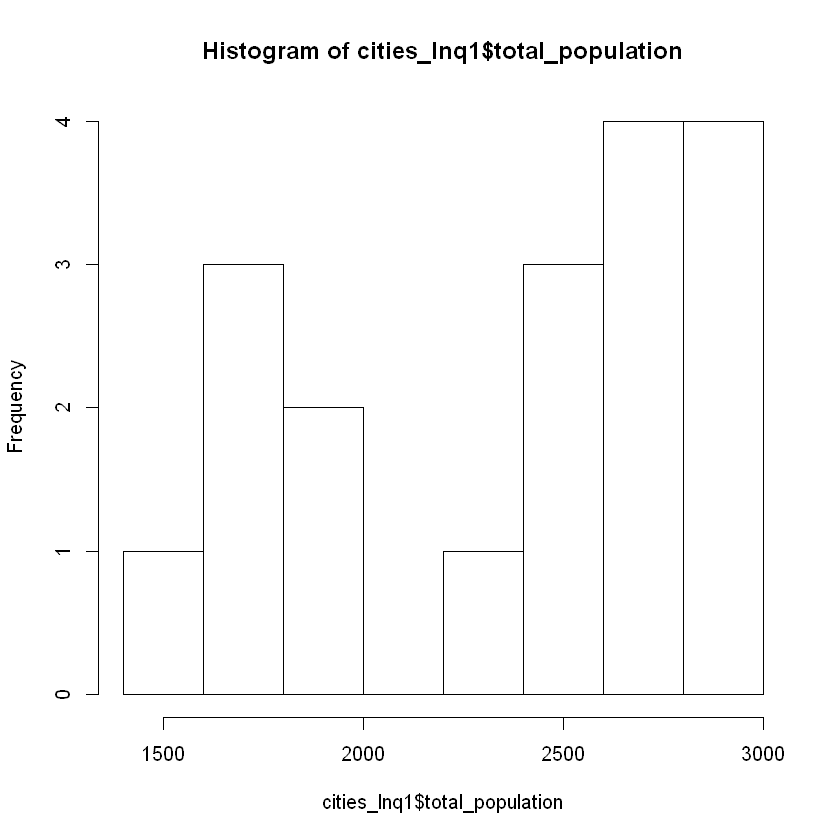

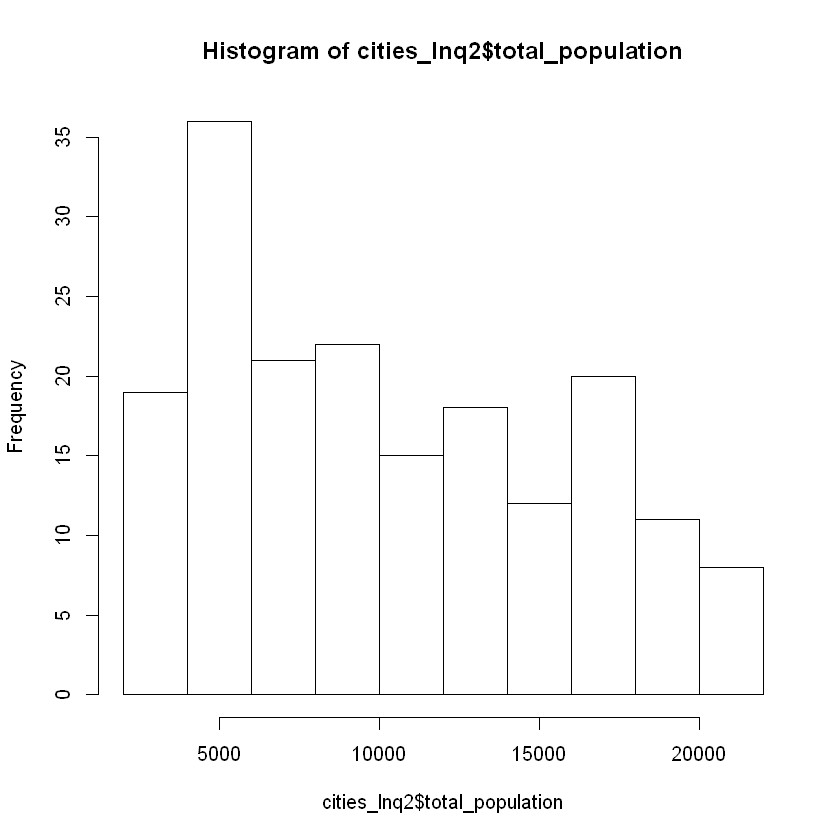

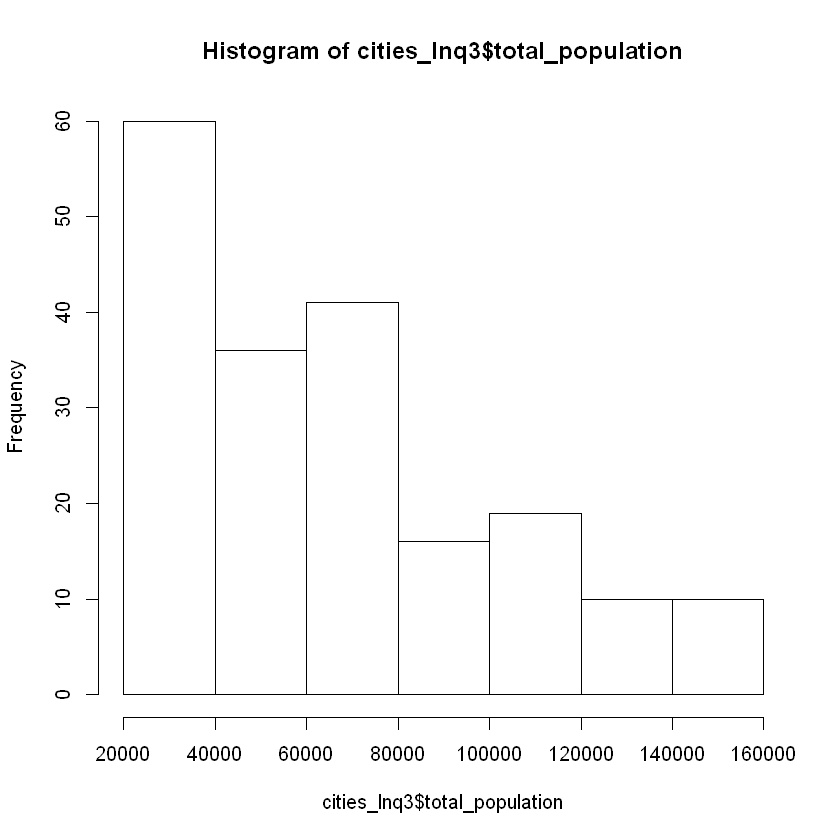

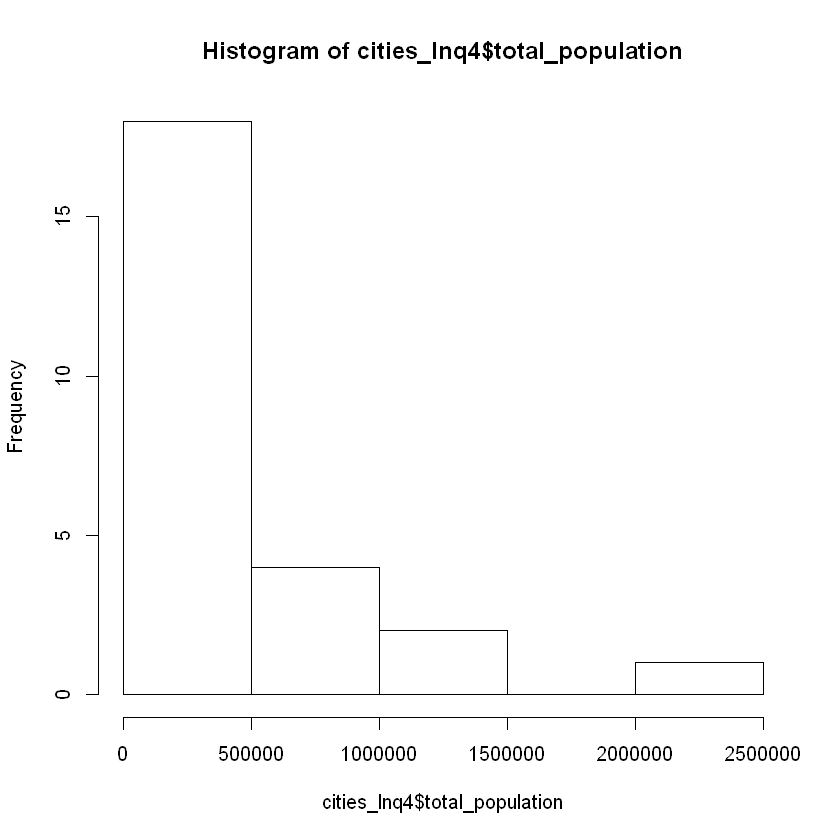

In [22]:
#cities by log population, log in order to fix skew of population, might make more even groups than the previous method

cities$ln_pop = log(cities$total_population)

cities_lnq1 <- subset(cities, ln_pop < 8)
cities_lnq2 <- subset(cities, ln_pop >= 8 & ln_pop < 10)
cities_lnq3 <- subset(cities, ln_pop >= 10 & ln_pop < 12)
cities_lnq4 <- subset(cities, ln_pop > 12)

cities_lnq <- c(cities_lnq1, cities_lnq2, cities_lnq3, cities_lnq4)


count(cities_lnq1)
count(cities_lnq2)
count(cities_lnq3)
count(cities_lnq4)

summary(cities_lnq1$total_population)
summary(cities_lnq2$total_population)
summary(cities_lnq3$total_population)
summary(cities_lnq4$total_population)

hist(cities_lnq1$total_population)
hist(cities_lnq2$total_population)
hist(cities_lnq3$total_population)
hist(cities_lnq4$total_population)



In [23]:
#with sample single variable regressions

#simple quartiles, even groups
cities_q1 <- na.omit(cities_q1)
lm(cities_q1$Total.Claims ~ cities_q1$total_population)

#roughly 1/4 of population intervals, uneven groups
cities_g1 <- na.omit(cities_g1)
lm(cities_g1$Total.Claims ~ cities_g1$total_population)

#roughly 1/4 of ln(population) intervals, uneven groups (helps correct skew for population)
cities_lnq2 <- na.omit(cities_lnq3)
lm(cities_lnq3$Total.Claims ~ cities_lnq3$total_population)

#normal ungrouped
lm(cities$Total.Claims ~ cities$total_population)

#ungrouped, with ln for helping with skew
lm(Total.Claims ~ ln_pop, data = cities)


Call:
lm(formula = cities_q1$Total.Claims ~ cities_q1$total_population)

Coefficients:
               (Intercept)  cities_q1$total_population  
                   6.48733                     0.01811  



Call:
lm(formula = cities_g1$Total.Claims ~ cities_g1$total_population)

Coefficients:
               (Intercept)  cities_g1$total_population  
                 1.483e+02                   4.543e-03  



Call:
lm(formula = cities_lnq3$Total.Claims ~ cities_lnq3$total_population)

Coefficients:
                 (Intercept)  cities_lnq3$total_population  
                  -73.722871                      0.009259  



Call:
lm(formula = cities$Total.Claims ~ cities$total_population)

Coefficients:
            (Intercept)  cities$total_population  
              3.086e+02                2.251e-03  



Call:
lm(formula = Total.Claims ~ ln_pop, data = cities)

Coefficients:
(Intercept)       ln_pop  
    -3458.0        386.7  


In [39]:
#with coefficients

#simple quartiles, even groups
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_q1)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_q2)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_q3)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_q4)


#roughly 1/4 of population intervals, uneven groups
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_g1)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_g2)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_g3)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_g4)

#roughly 1/4 of ln(population) intervals, uneven groups (helps correct skew for population)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_lnq1)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_lnq2)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_lnq3)
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities_lnq4)

#normal ungrouped
lm(Total.Claims ~ total_population + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities)

#ungrouped, with ln for helping with skew
lm(Total.Claims ~ ln_pop + Budget + Total.Tax.Revenue + Total.Programs + ces_score_median + TotalFirstYearGrosskWh, data = cities)



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_q1)

Coefficients:
           (Intercept)        total_population                  Budget  
            -1.829e+02               1.437e-02              -1.335e-03  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
             1.507e-06               1.057e+02               5.987e-01  
TotalFirstYearGrosskWh  
             8.283e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_q2)

Coefficients:
           (Intercept)        total_population                  Budget  
            -1.621e+02              -5.404e-04              -4.979e-04  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
             8.348e-08               1.847e+02               1.948e+00  
TotalFirstYearGrosskWh  
             5.038e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_q3)

Coefficients:
           (Intercept)        total_population                  Budget  
             2.393e+01               2.663e-03              -3.815e-04  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -1.037e-06               6.022e+01               1.969e+00  
TotalFirstYearGrosskWh  
             7.847e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_q4)

Coefficients:
           (Intercept)        total_population                  Budget  
            -3.155e+02               8.948e-04              -1.298e-05  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -1.021e-06               5.074e+02              -1.596e+01  
TotalFirstYearGrosskWh  
             8.404e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_g1)

Coefficients:
           (Intercept)        total_population                  Budget  
            -2.698e+01               2.541e-03              -4.353e-04  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -5.354e-07               8.569e+01              -1.162e+00  
TotalFirstYearGrosskWh  
             8.019e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_g2)

Coefficients:
           (Intercept)        total_population                  Budget  
            -1.589e+03               9.528e-03              -6.988e-05  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -2.450e-06               9.753e+02              -6.344e-01  
TotalFirstYearGrosskWh  
             3.994e-05  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_g3)

Coefficients:
           (Intercept)        total_population                  Budget  
            -7.655e+03              -4.585e-02               8.457e-03  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
             2.151e-05              -4.560e+02               2.910e+02  
TotalFirstYearGrosskWh  
            -1.476e-03  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_g4)

Coefficients:
           (Intercept)        total_population                  Budget  
             5.099e+03              -2.238e-03              -1.225e-04  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -1.452e-06               1.130e+03              -1.761e+02  
TotalFirstYearGrosskWh  
             1.046e-03  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_lnq1)

Coefficients:
           (Intercept)        total_population                  Budget  
             197.44885                -0.06106                      NA  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
                    NA                      NA                      NA  
TotalFirstYearGrosskWh  
                    NA  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_lnq2)

Coefficients:
           (Intercept)        total_population                  Budget  
             1.373e+02               5.627e-03               5.077e-04  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -1.021e-06               3.966e+00              -8.468e+00  
TotalFirstYearGrosskWh  
             3.311e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_lnq3)

Coefficients:
           (Intercept)        total_population                  Budget  
             1.373e+02               5.627e-03               5.077e-04  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -1.021e-06               3.966e+00              -8.468e+00  
TotalFirstYearGrosskWh  
             3.311e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities_lnq4)

Coefficients:
           (Intercept)        total_population                  Budget  
             1.704e+03              -2.478e-04              -7.740e-05  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -1.250e-06               8.176e+02              -9.401e+01  
TotalFirstYearGrosskWh  
             9.975e-04  



Call:
lm(formula = Total.Claims ~ total_population + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities)

Coefficients:
           (Intercept)        total_population                  Budget  
            -6.086e+01               1.915e-03              -9.221e-05  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -5.924e-07               1.313e+02              -5.772e+00  
TotalFirstYearGrosskWh  
             8.519e-04  



Call:
lm(formula = Total.Claims ~ ln_pop + Budget + Total.Tax.Revenue + 
    Total.Programs + ces_score_median + TotalFirstYearGrosskWh, 
    data = cities)

Coefficients:
           (Intercept)                  ln_pop                  Budget  
            -9.515e+02               8.805e+01              -1.198e-04  
     Total.Tax.Revenue          Total.Programs        ces_score_median  
            -3.514e-07               1.515e+02              -4.586e+00  
TotalFirstYearGrosskWh  
             8.641e-04  



Call:
lm(formula = Total.Tax.Revenue ~ poly(total_population, 4, raw = TRUE), 
    data = cities_nona)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.967e+09 -6.929e+07 -1.644e+07  5.561e+07  8.746e+09 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             1.215e+08  5.933e+07   2.048   0.0415
poly(total_population, 4, raw = TRUE)1 -2.092e+03  1.156e+03  -1.811   0.0712
poly(total_population, 4, raw = TRUE)2  2.095e-02  3.951e-03   5.304 2.27e-07
poly(total_population, 4, raw = TRUE)3 -1.887e-08  3.807e-09  -4.957 1.22e-06
poly(total_population, 4, raw = TRUE)4  4.715e-15  9.710e-16   4.855 1.97e-06
                                          
(Intercept)                            *  
poly(total_population, 4, raw = TRUE)1 .  
poly(total_population, 4, raw = TRUE)2 ***
poly(total_population, 4, raw = TRUE)3 ***
poly(total_population, 4, raw = TRUE)4 ***
---
Signif. codes:  0 '***' 0.0

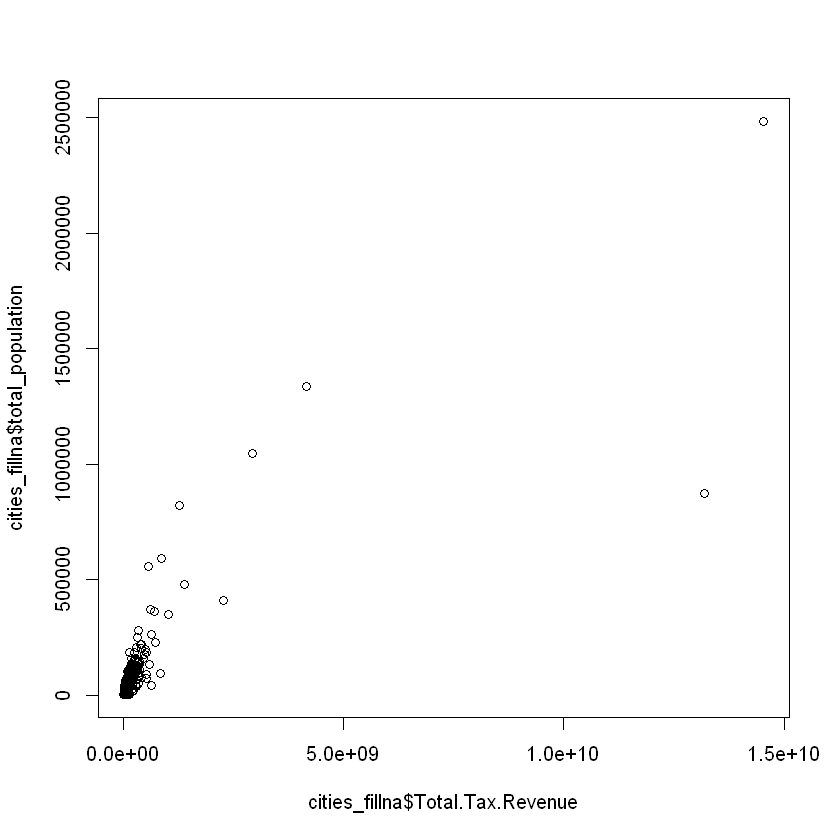

[1] 0.8351602

[1] 0.8293935


Call:
lm(formula = Total.Tax.Revenue ~ total_population, data = cities)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.690e+09 -1.018e+08  6.876e+07  1.329e+08  8.981e+09 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.732e+08  4.179e+07  -4.144 4.47e-05 ***
total_population  5.020e+03  1.938e+02  25.903  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 654100000 on 291 degrees of freedom
  (124 observations deleted due to missingness)
Multiple R-squared:  0.6975,	Adjusted R-squared:  0.6965 
F-statistic:   671 on 1 and 291 DF,  p-value: < 2.2e-16



Call:
lm(formula = Total.Tax.Revenue ~ total_population, data = cities_fillna)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.655e+09 -8.698e+07  4.472e+07  1.401e+08  9.023e+09 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.017e+08  2.928e+07  -3.474 0.000566 ***
total_population  4.891e+03  1.617e+02  30.244  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 557900000 on 415 degrees of freedom
Multiple R-squared:  0.6879,	Adjusted R-squared:  0.6871 
F-statistic: 914.7 on 1 and 415 DF,  p-value: < 2.2e-16


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
1.127e+06 2.895e+07 8.007e+07 2.648e+08 1.934e+08 1.455e+10       124 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.127e+06 4.662e+07 1.026e+08 2.166e+08 1.294e+08 1.455e+10 

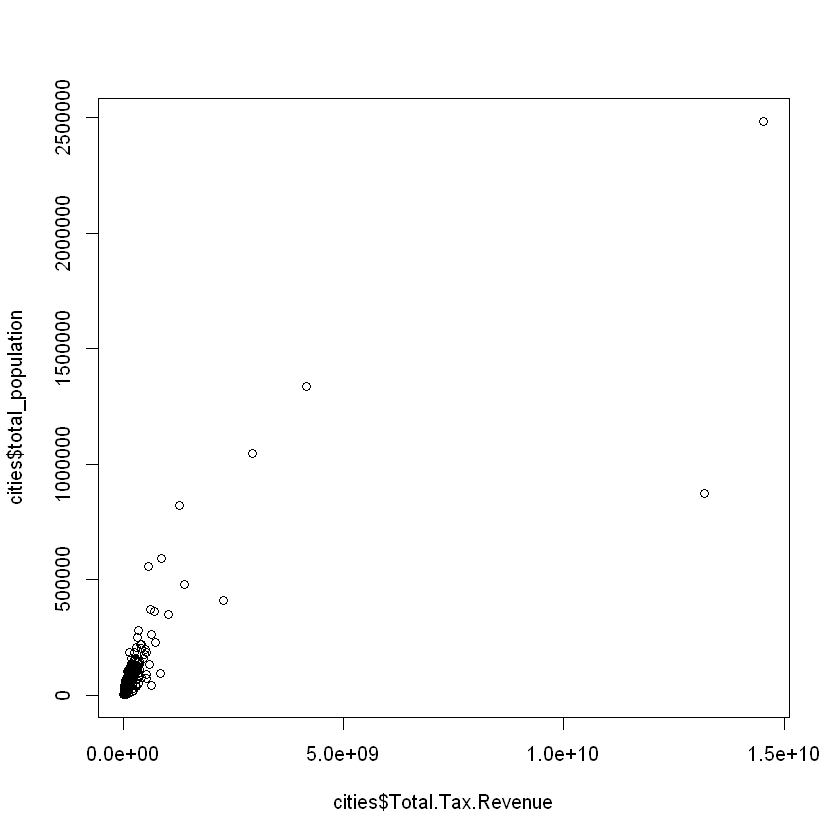

In [103]:
#fill with ln_pop prediction
#cities$ln_pop = log(cities$total_population)

cities <- read.csv('C:/Users/ather/CS Projects/CETLab/caeecc-energy-efficiency/cities_2.csv')

cities_nona <- cities %>% filter(!is.na(Total.Tax.Revenue))
fit <- lm(Total.Tax.Revenue ~ poly(total_population, 4, raw = TRUE), data = cities_nona)
summary(fit)

cities_fillna <- cities %>%
    mutate(pred = predict(fit,.)) %>%
    mutate(Total.Tax.Revenue = ifelse(is.na(Total.Tax.Revenue), pred, Total.Tax.Revenue))


plot(cities_fillna$Total.Tax.Revenue, cities_fillna$total_population)
plot(cities$Total.Tax.Revenue, cities$total_population)

#summary(cities_fillna$Total.Tax.Revenue)

#cities_fillna %>% as.data.frame()

cor(cities$total_population, cities$Total.Tax.Revenue, use = "complete.obs")
cor(cities_fillna$total_population, cities_fillna$Total.Tax.Revenue, use = "complete.obs")

unfilled_model <- lm(Total.Tax.Revenue ~ total_population, data = cities)
filled_model <- lm(Total.Tax.Revenue ~ total_population, data = cities_fillna)

summary(unfilled_model)
summary(filled_model)

summary(cities$Total.Tax.Revenue)
summary(cities_fillna$Total.Tax.Revenue)